# KMeans Cluster Analysis

Visualizing relationship between layers and heads across clusters and density of points in the layer/head attention matrix in clusters. The first groupby plots are hard to get much out of, but when visualizing the density of points across the layer/head matrix in these clusters there is visible horizontal banding, a few being all at the last layer and some almost all at the first layer, with many more across part but not all of the middle layers.  It would appear that some of the structure of the architecture of this transformer has been preserved through our scaling and transformation.

In [1]:
import cuml
import cudf

In [2]:
import os
import time
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
output_dir='/rapids/notebooks/host/representations/output/'

In [4]:
df = torch.load(os.path.join(output_dir,'dask_kmeans_df_labels.bin'))

/opt/conda/envs/rapids/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

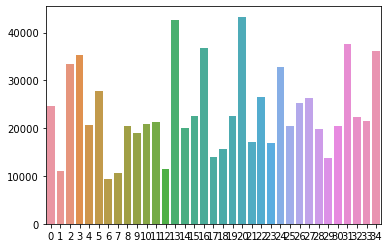

In [25]:
label_count = df['cluster'].value_counts()

x = label_count.index
y = label_count.values

sns.barplot(x, y)

<AxesSubplot:xlabel='cluster'>

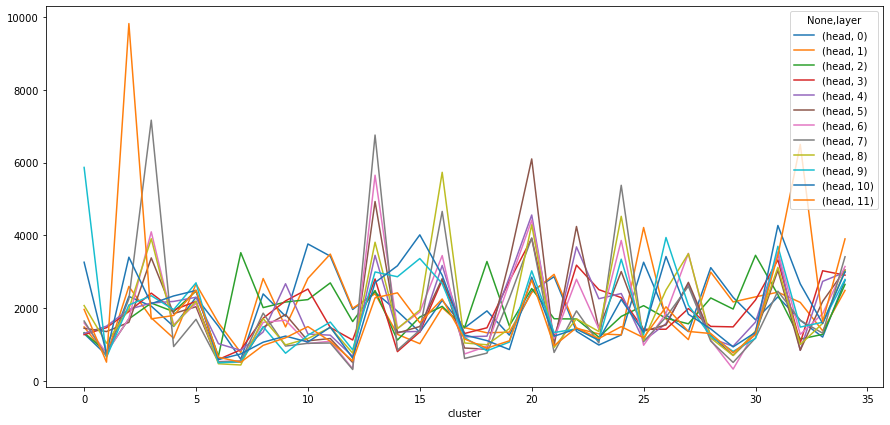

In [26]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['cluster','layer']).count().unstack().plot(ax=ax)

<AxesSubplot:xlabel='cluster'>

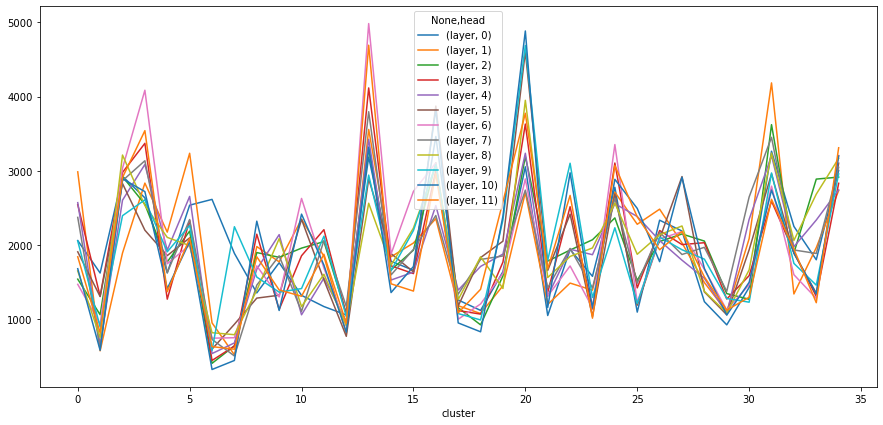

In [27]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['cluster','head']).count().unstack().plot(ax=ax)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820800 entries, 0 to 8058
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   cluster  820800 non-null  int32
 1   layer    820800 non-null  int64
 2   head     820800 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 21.9 MB


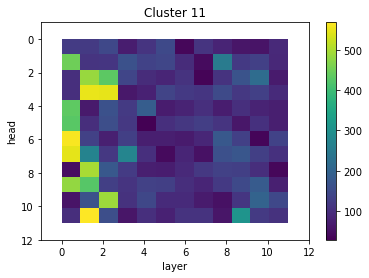

In [8]:
c = 11
df_c = df[df['cluster'] == c]
h = plt.hist2d(df_c['layer'],df_c['head'], bins=12)
plt.title(f"Cluster {c}")
plt.xlabel("layer")
plt.ylabel("head")
plt.xlim([-1,12])
plt.ylim([12,-1])
plt.colorbar(h[3])

In [10]:
df_clusters = {}
for c in range(0, len(df.groupby('cluster'))):
    df_clusters[c] = df[df['cluster'] == c]

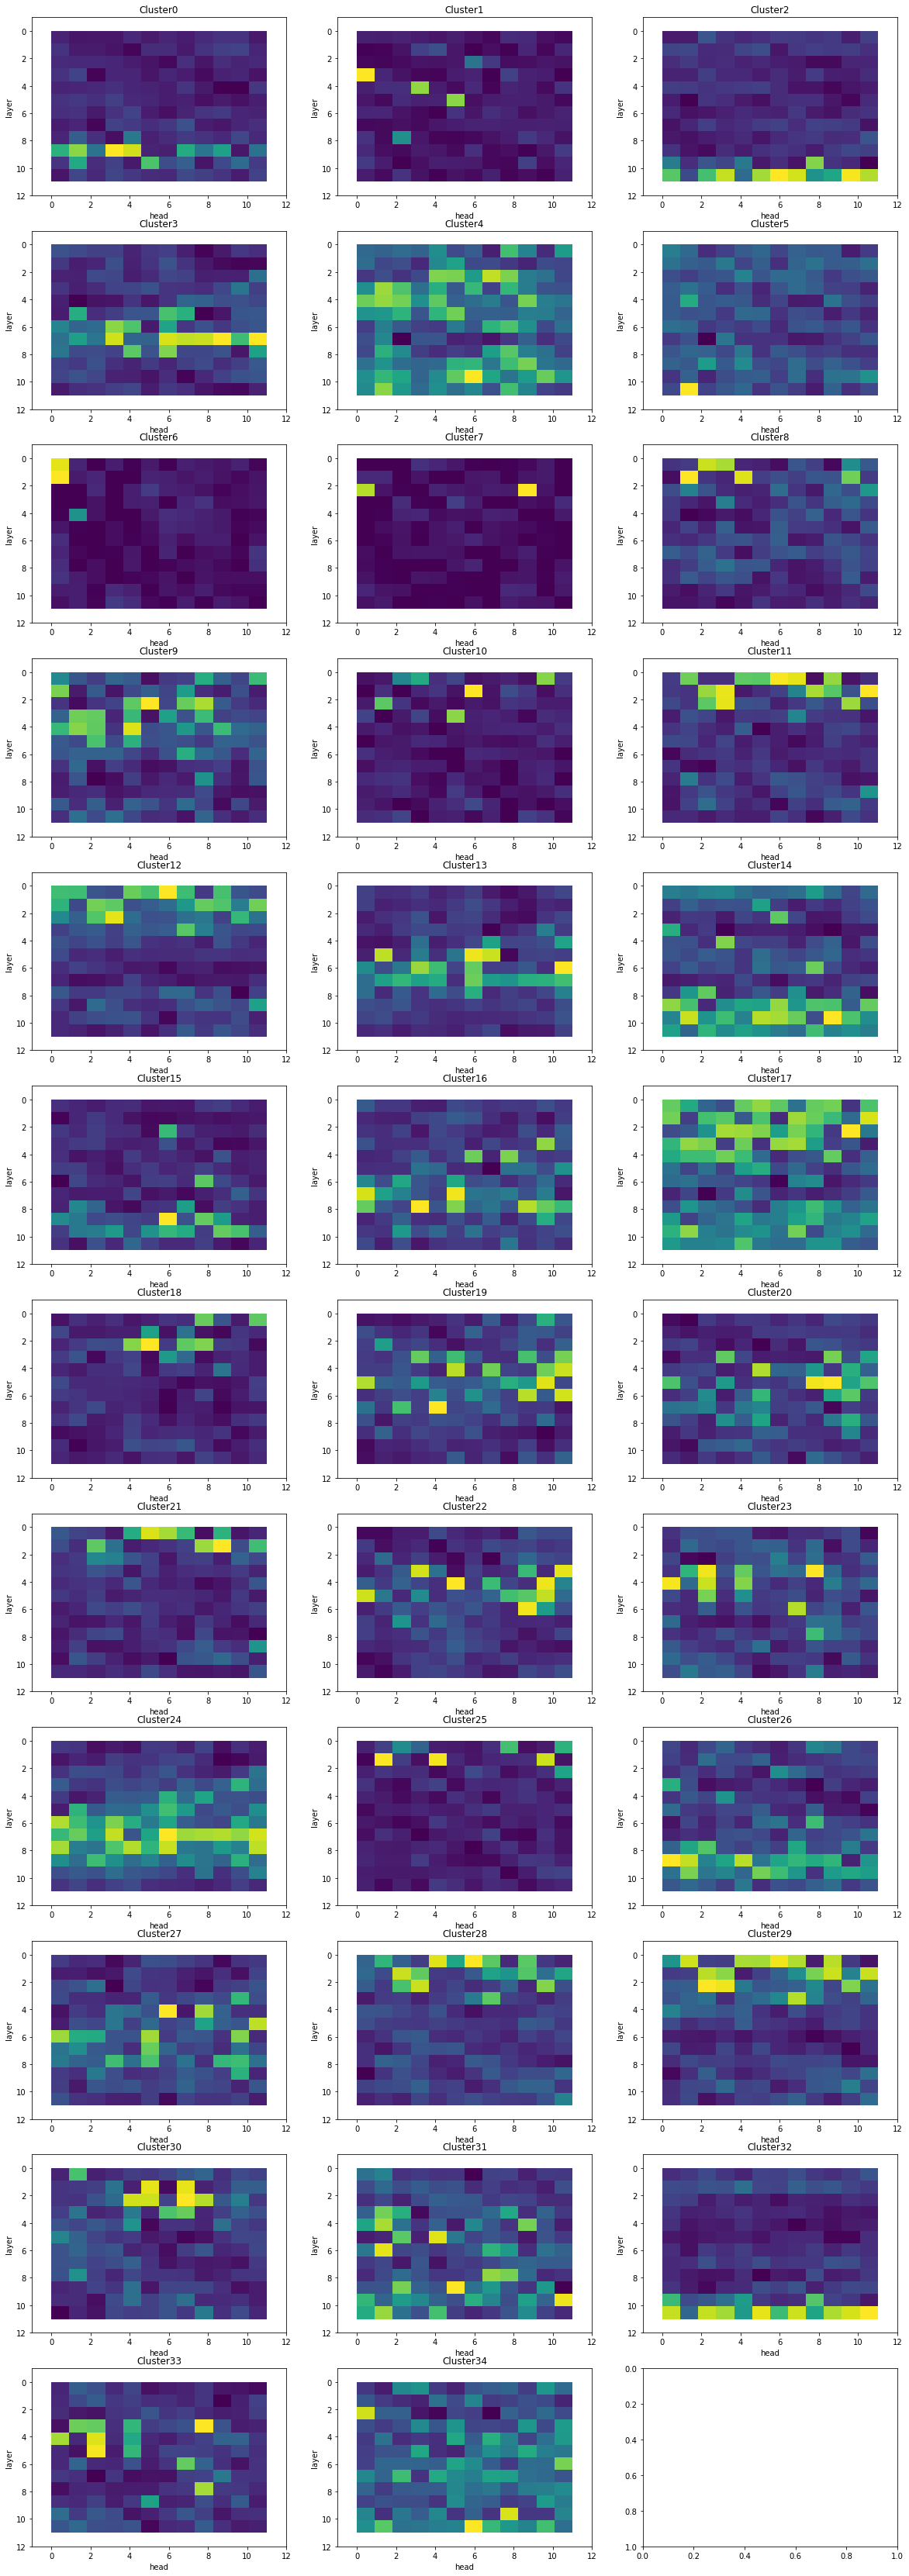

In [11]:
fig, axis = plt.subplots(12, 3, figsize=(20,60))

for i, axs in enumerate(axis.flat):
    if i == 35 :
        continue
    im = axs.hist2d(df_clusters[i]['head'],df_clusters[i]['layer'], bins=12)
    axs.set(xlabel='head', ylabel='layer', xlim=[-1,12], ylim=[12,-1], title=f'Cluster{i}')

plt.gca().invert_yaxis()